In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor, ExtraTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import math
from sklearn.model_selection import GroupShuffleSplit, GroupKFold, GridSearchCV, cross_val_score


In [51]:
data = pd.read_csv('statefinal.csv')

In [52]:
#create split using group shuffle to keep state together
gss=GroupShuffleSplit(n_splits=2, train_size=.8, random_state=10)

#column to group by
split = gss.split(data, groups=data['state_group'])

#splitting testing and training indexes
train_inds, test_inds = next(split)

#test and train dfs split by state
train=data.iloc[train_inds]
test=data.iloc[test_inds]

In [53]:
print(train.shape)
print(test.shape)

(320, 56)
(88, 56)


In [54]:
#create y test & train data
y_test = np.array(test['diff_weeks'])
y_train = np.array(train['diff_weeks'])

In [55]:
#create x test and train data. For county data just need to change the features, USE -34 in iloc
x_test = test.iloc[:,-42:]
x_train = train.iloc[:,-42:]

In [56]:
x = data.loc[:, data.columns != 'diff_weeks']
y = (data['diff_weeks'])

In [57]:
scale = MinMaxScaler()
x_train2 = scale.fit_transform(x_train)
x_test2 = scale.fit_transform(x_test)
y_train2 = scale.fit_transform(y_train.reshape(-1,1))
y_test2 = scale.fit_transform(y_test.reshape(-1,1))

In [58]:
tree = DecisionTreeRegressor(random_state=0).fit(x_train, y_train)

In [59]:
y_pred = tree.predict(x_test)

In [60]:
tree.score(x_test, y_test)

0.6535305230841894

In [61]:
mape = np.mean(np.abs((y_test - y_pred) / y_test))
print(mape)

0.30887029110427466


In [62]:
print(math.sqrt(metrics.mean_squared_error(y_pred, y_test)))

4.924428900898052


In [63]:
print(metrics.mean_squared_error(y_pred, y_test))

24.25


In [64]:
print(metrics.mean_absolute_error(y_pred, y_test))

3.3636363636363638


In [65]:
y_pred1 = tree.predict(x_train)

In [66]:
metrics.mean_squared_error(y_pred, y_test)

24.25

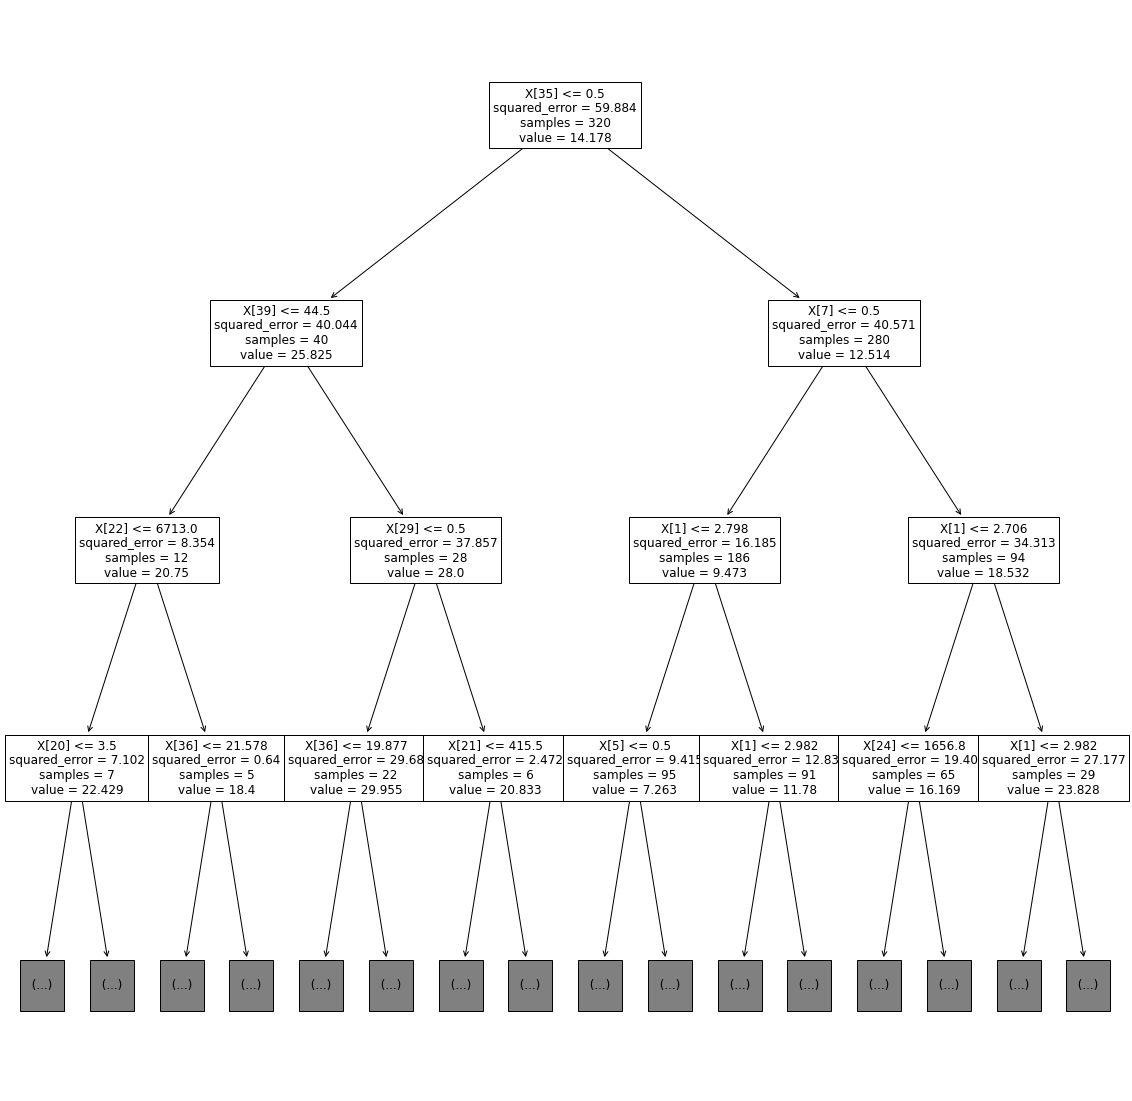

In [67]:
plt.figure(figsize=(20,20))
plot_tree(tree, max_depth=3, fontsize =12)
plt.show()

/Users/vanpan/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

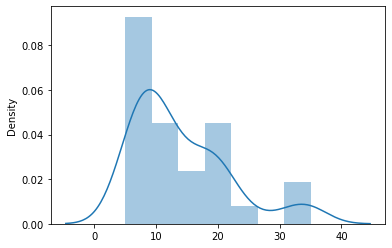

In [68]:
sns.distplot(y_pred)

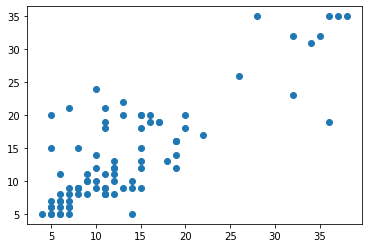

In [69]:
plt.scatter(y_test,y_pred)


In [70]:
scale = StandardScaler()
X_train = scale.fit_transform(x_train)
X_test = scale.fit_transform(x_test)

In [71]:
treenew = DecisionTreeRegressor(random_state=0).fit(X_train, y_train)

In [72]:
prednew = treenew.predict(X_test)

In [73]:
mape = np.mean(np.abs((y_test - prednew) / y_test))
print(mape)

print(math.sqrt(metrics.mean_squared_error(prednew, y_test)))

print(metrics.mean_squared_error(prednew, y_test))

print(metrics.mean_absolute_error(prednew, y_test))

0.29083929278021414
4.980644354078916
24.806818181818183
3.284090909090909


In [74]:
treenew.score(X_test, y_test)

0.6455750383752509

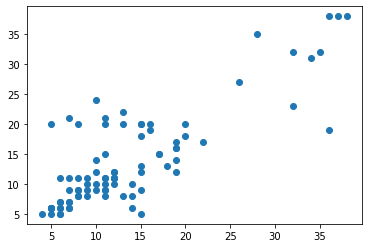

In [75]:
plt.scatter(y_test,prednew)


/Users/vanpan/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

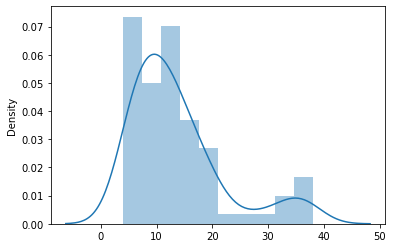

In [76]:
sns.distplot(y_test)

In [77]:
#SVR

In [78]:
from sklearn.svm import SVR

In [79]:
scale = MinMaxScaler()
x_train2 = scale.fit_transform(x_train)
x_test2 = scale.fit_transform(x_test)
y_train2 = scale.fit_transform(y_train.reshape(-1,1))
y_test2 = scale.fit_transform(y_test.reshape(-1,1))

In [80]:
svr = SVR().fit(x_train2, y_train2)

/Users/vanpan/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [81]:
svrpred = svr.predict(x_test2)

In [82]:
metrics.r2_score(svrpred, y_test2)

-0.5341864529096441

In [83]:
mape = np.mean(np.abs((y_test2 - svrpred) / y_test2))
print(mape)

print(math.sqrt(metrics.mean_squared_error(svrpred, y_test2)))

print(metrics.mean_squared_error(svrpred, y_test2))

print(metrics.mean_absolute_error(svrpred, y_test2))

inf
0.15779667740683254
0.024899791400635977
0.13558060658311483


/var/folders/_v/f8t16ncj18bdzf3ss6_9n9400000gn/T/ipykernel_2162/2020268332.py:1: RuntimeWarning: divide by zero encountered in true_divide
  mape = np.mean(np.abs((y_test2 - svrpred) / y_test2))


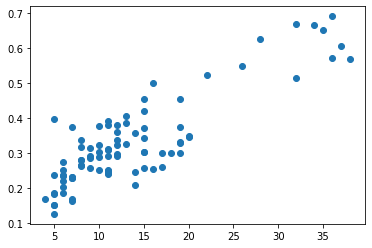

In [84]:
plt.scatter(y_test, svrpred)
plt.show()

In [ ]:
group_train=np.array(train['state_group'])
param = {'kernel':['poly','rbf','linear'],'degree':[1,2,3,4,5], 'gamma':[0.1,0.025,0.05,0.01]}
gkf=GroupKFold(n_splits=5).split(x_train, y_train,group_train )
grid = GridSearchCV(svr, param_grid = param, scoring = 'neg_root_mean_squared_error', cv=gkf)
result=grid.fit(x_train, y_train )
print(grid.best_params_)